In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

In [2]:
def generate_dist(dist):
    """
       input : dist = an array of size n, each element represent a probability (to have a crime commited here)
       the function modify the distribution to simulate a new day, crime probability decreases with time if no new crime
       return : the modified distribution
    """
    dist = np.where(dist == 1, 0.5, dist - decreasing_rate)
    dist = np.where(dist < rate_quiet, rate_quiet, dist)
    return dist

    

In [3]:
def generate_crime():
    """
    this function generate crime in function of the probability contained in town and it modify the 'town' array 
    return: the number of crime commited on this day
    """
    global town
    cnt = 0
    temp = np.copy(town)
    for i in range(len(town)):
        if random() < town[i]:
            temp[i]=1
            cnt+=1
            
            if i < len(town)-1:
                temp[i+1] = 0.5
            if i > 0:
                if temp[i-1] != 1:
                    temp[i-1] = 0.5
    town = np.copy(temp)
    return cnt

In [4]:
def get_dest_policeman(dist):
    """
    input: dist = distribution of crme probability seen by the police
    the function select the highest probability of crime 
    return: the indices of those probability
    """
    temp = np.copy(dist)
    for i in range(len(temp)):
         temp[i]+=(random()*0.001)                                          #add random, else argsort always return the same array if values are equal
    
    all_indices_sorted = np.argsort(temp)[::-1]                             #returns the indices of the array elements in sorted order biggest to smallest
    
    return all_indices_sorted[:num_policeman]

In [5]:
def detect_crime(policeman_dest):
    """
    input: policeman_dest = the indices of the place the policeman will visit today
    this function check if the policeman visit a place where there is a crime, update dist_algo and nb_detected_crime in function
    returns: the number of detected crime today
    """
    nb_detected_crime = 0
    global dist_algo
    for policeman in policeman_dest:
        policeman = int(policeman)
        if town[policeman]==1:
            nb_detected_crime+=1
            dist_algo[policeman] = 1
            
            if policeman < len(dist_algo)-1:
                if dist_algo[policeman+1] != 1:
                    dist_algo[policeman+1] = 0.5
            if policeman > 0:
                if dist_algo[policeman-1] != 1:
                    dist_algo[policeman-1] = 0.5
                
    return nb_detected_crime

# Scenario1 : No racism, no limits for policeman

This scenario is used as a reference scenarion to compare the efficiency of the 2 others scenarios

* __town__ is an array, each element represent a probability of having a crime occuring there
* __dist_algo__ is an array, each element represent what probability policeman think a crime could occure there
* __num_policeman__ is the number of policeman trying to detect crime
* __rate_quiet__ is the minimum probability of a crime occuring 
* __decreasing_rate__ is the speed with which the probability of crime decreases if P>rate_quiet
* __days__ is the number of days for the experiment
* __nb_crime__ is the total number of crime commited since the begining of the experiment
* __detected_crime__ is the number of detected crime since the begining of the experiment

In [6]:
town = np.zeros(100) 
dist_algo = np.zeros(100) 
num_policeman = 24 
rate_quiet = 0.0001 
decreasing_rate = 0.175 
days = 100000
nb_crime = 0
detected_crime = 0

In [8]:
for i in range(len(town)):
    town[i] = rate_quiet
    dist_algo[i] = rate_quiet
    
for day in range(days):
    dest_policeman = get_dest_policeman(dist_algo)
    
    nb_crime += generate_crime()
    detected_crime += detect_crime(dest_policeman)
    
    town = generate_dist(town)
    dist_algo = generate_dist(dist_algo)

print(detected_crime/nb_crime)
print(nb_crime)
efficiency_first_sc = detected_crime/nb_crime

0.9428759613527526
201929


# Scenario2 : Racism but still no limits

In the second scenario policeman tend to visit the left part of the town more frequently, the racism is implemented with a 'bias' parameter, the higher the more racist policeman are (see under for more infos). This 'bias parameter will change the get_dest_policeman function. Also another function 'bias_impact' is implemented to see the efficiency of policeman in the left/right parts of the town 

In [7]:
def get_dest_rac_policeman(dist):
    """
    input: dist_algo (up)
    the function is similar to get_dest_policeman, however, if policeman have the choice they will visit the left side more often: an additional random number is added to  the left side
    returns: the locations policeman will visit today
    """
    temp = np.copy(dist)
    for i in range(len(temp)):
        if i < len(temp)/2:
            temp[i]+=(random()*0.001 + bias * random() * 0.001)                 #bias is acting if 2 spot have the same P for a crime, policeman will go more iin tthe biased place
        else:
             temp[i]+=(random()*0.001)                                          #add random, else argsort always return the same array if values are equal
    
    all_indices_sorted = np.argsort(temp)[::-1]  #returns the indices of the array elements in sorted order biggest to smallest
    
    return all_indices_sorted[:num_policeman]

In [8]:
def bias_impact( n_crime_left, n_crime_left_detected, n_crime_right, n_crime_right_detected):
    """
    inputs: n_crime_left/right = number of crime commited since the beginning of the experiment in the part left/right
            n_crime_left/right_detected = number of crime detected since the beginning of the experiment in the part left/right
    this function compute the impact of the bias, 
    returns: an updated version of the arguments
    """
    for i in range(len(town)):
        if town[i]==1:
            if i < len(town)/2:
                n_crime_left+=1
            else:
                n_crime_right+=1
        if dist_algo[i]==1:
            if i < len(dist_algo)/2:
                n_crime_left_detected+=1
            else:
                n_crime_right_detected+=1 
    
    return  n_crime_left, n_crime_left_detected, n_crime_right, n_crime_right_detected

In [9]:
town = np.zeros(100) 
dist_algo = np.zeros(100) 
num_policeman = 24 
rate_quiet = 0.0001 
decreasing_rate = 0.175 
days = 100000
nb_crime = 0
detected_crime = 0

* __bias__ is the bias policeman have to the left community 
(see [link text](./bias_argument.ipynb) for more infos on the bias parametter on policeman distribution)
* __n_crime_left__  is the number of crime commited since the beginning of the experiment in the part left
* __n_crime_left_detected__ is the number of crime detected since the beginning of the experiment in the part left
* __n_crime_right__  is the number of crime commited since the beginning of the experiment in the part right
* __n_crime_right_detected__ is the number of crime detected since the beginning of the experiment in the part right

In [10]:
bias = 0.4 #0.2=>60%
n_crime_left = 0
n_crime_left_detected = 0
n_crime_right = 0
n_crime_right_detected = 0

In [13]:
for i in range(len(town)):
    town[i] = rate_quiet
    dist_algo[i] = rate_quiet
    
for day in range(days):
    dest_policeman = get_dest_rac_policeman(dist_algo)
    
    nb_crime += generate_crime()
    detected_crime += detect_crime(dest_policeman)
    n_crime_left, n_crime_left_detected, n_crime_right, n_crime_right_detected =  bias_impact(n_crime_left, n_crime_left_detected, n_crime_right, n_crime_right_detected)
    
    town = generate_dist(town)
    dist_algo = generate_dist(dist_algo)

print(detected_crime/nb_crime)     
print("left", n_crime_left_detected/n_crime_left)     
print("rigth", n_crime_right_detected/n_crime_right)
efficiency_second_sc = detected_crime/nb_crime
efficiency_left_second_sc = n_crime_left_detected/n_crime_left
efficiency_right_second_sc = n_crime_right_detected/n_crime_right

0.9207319056403013
left 0.9627683804549182
rigth 0.8850659612477669


# Scenario 3: racism but policeman are forced to spread half/half 

In the third scenario, policeman are forced to visit the left and the right part of the town the same way, in consequence the bias as no longer any impact. 'get_dest_policeman' was once more modified

In [11]:
def get_dest_forced_policeman(dist):
    """
    input: dist_algo (up)
    the function is similar to get_dest_policeman, however half policeman will go to the lft part and half to the right
    returns: the locations policeman will visit today
    """
    temp = np.copy(dist)
    border = int(len(temp)/2)
    for i in range(len(temp)):
         temp[i]+=(random()*0.001)                            #add random, else argsort always return the same array if values are equal
    
    left_temp = temp[:border]
    right_temp = temp[border:]
    left_indices_sorted = np.argsort(left_temp)[::-1]  
    right_indices_sorted = np.argsort(right_temp)[::-1] + border  # argsort return the id of right indices temp, not of temp
    
    all_indices = np.append(left_indices_sorted[:int(num_policeman/2)], right_indices_sorted[:int(num_policeman/2)])
    return all_indices    

In [12]:
town = np.zeros(100) 
dist_algo = np.zeros(100) 
num_policeman = 24 
rate_quiet = 0.0001 
decreasing_rate = 0.175 
days = 100000
nb_crime = 0
detected_crime = 0

In [13]:
bias = 0.4 #useless here
n_crime_left = 0
n_crime_left_detected = 0
n_crime_right = 0
n_crime_right_detected = 0

In [17]:
for i in range(len(town)):
    town[i] = rate_quiet
    dist_algo[i] = rate_quiet
    
for day in range(days):
    dest_policeman = get_dest_forced_policeman(dist_algo)
    
    nb_crime += generate_crime()
    detected_crime += detect_crime(dest_policeman)
    n_crime_left, n_crime_left_detected, n_crime_right, n_crime_right_detected =  bias_impact(
        n_crime_left, n_crime_left_detected, n_crime_right, n_crime_right_detected)
    
    town = generate_dist(town)
    dist_algo = generate_dist(dist_algo)

print(detected_crime/nb_crime)     
print("left", n_crime_left_detected/n_crime_left)
print("rigth", n_crime_right_detected/n_crime_right)
efficiency_third_sc = detected_crime/nb_crime
efficiency_left_third_sc = n_crime_left_detected/n_crime_left
efficiency_right_third_sc = n_crime_right_detected/n_crime_right

0.8306246106801065
left 0.8381743098571999
rigth 0.8230111722557107


# Analysis
In the following section we will analyse some of the data we can get from the previous experiments
If no prediction algorithm is used, policeman spread randomly, in consequence the efficency of policeman is about: $$efficiency(random) = \frac{num\_policeman}{len(town)}$$
With the parameters used for the experiments it would be equal to $24\%$
Parametters (num_policeman, decreasing_rate, rate_quiet) were choosen arbitrarily in order to correspond to conclusions of the real life PredPol algorithm sources : 
* [fouloscopie: Peut-on prédire les futurs crimes ?](https://www.youtube.com/watch?v=HHCiNPtR1NI&t=637s)
* [Jeff Brantingham: Mind Technology and Society Talk](https://www.youtube.com/watch?v=JkpuohfoJws&t=4080s)
## analysis of the different efficiencies

### first scenario

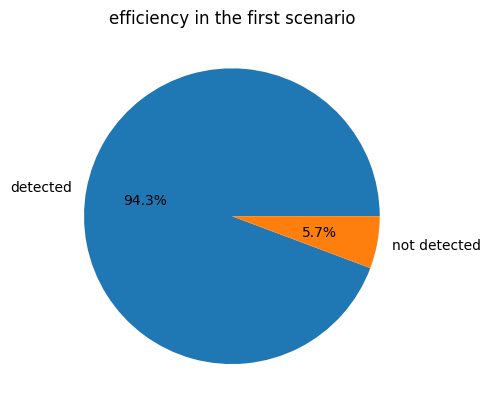

In [18]:
plt.pie([efficiency_first_sc, 1-efficiency_first_sc], labels = ["detected", "not detected"], autopct = '%1.1f%%')
plt.title("efficiency in the first scenario")
plt.show()

### second scenario

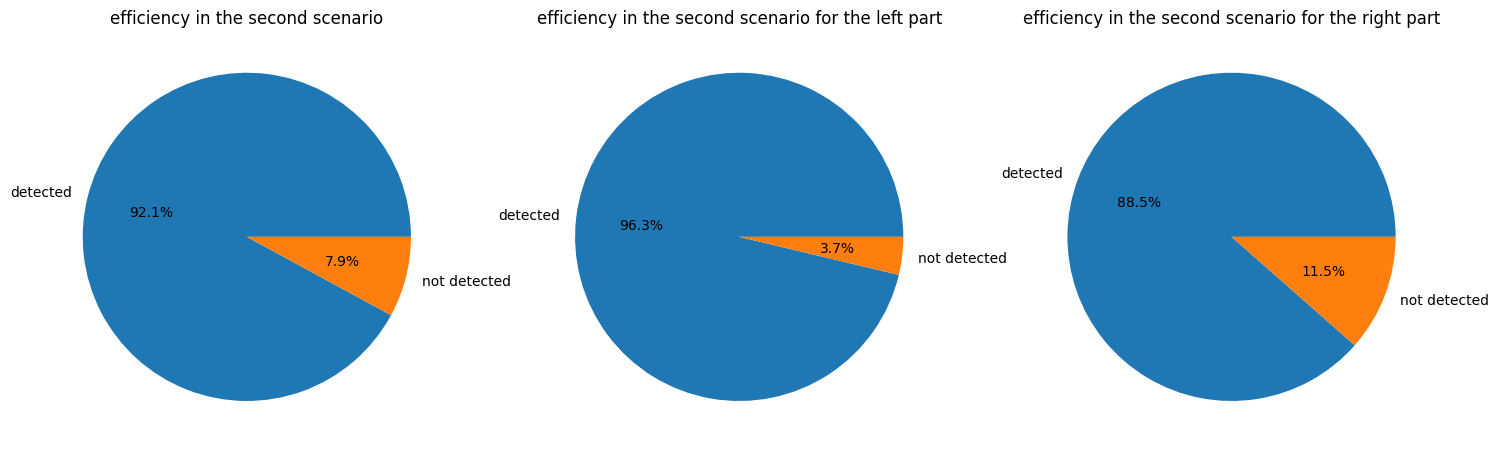

In [19]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 9))

# Plot the pie charts in the first subplot
ax[0].pie([efficiency_second_sc, 1-efficiency_second_sc], labels = ["detected", "not detected"], autopct = '%1.1f%%')
ax[0].set_title("efficiency in the second scenario")

# Plot the pie chart in the second subplot
ax[1].pie([efficiency_left_second_sc, 1-efficiency_left_second_sc], labels = ["detected", "not detected"], autopct = '%1.1f%%')
ax[1].set_title("efficiency in the second scenario for the left part")

# Plot the pie chart in the third subplot
ax[2].pie([efficiency_right_second_sc, 1-efficiency_right_second_sc], labels = ["detected", "not detected"], autopct = '%1.1f%%')
ax[2].set_title("efficiency in the second scenario for the right part")

plt.show()

### third scenario

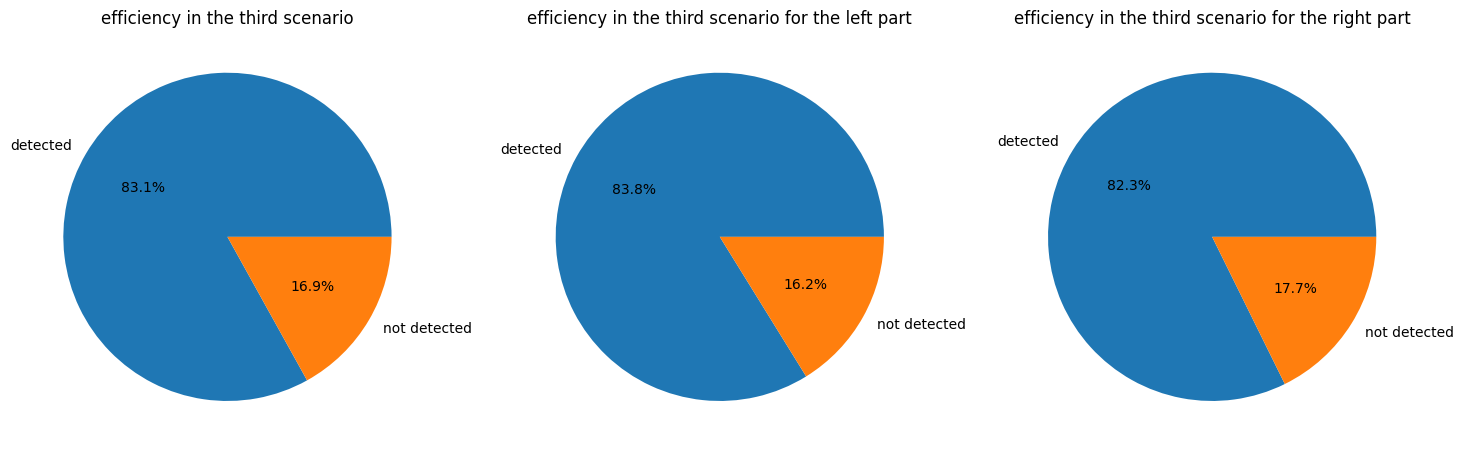

In [20]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 9))

# Plot the pie charts in the first subplot
ax[0].pie([efficiency_third_sc, 1-efficiency_third_sc], labels = ["detected", "not detected"], autopct = '%1.1f%%')
ax[0].set_title("efficiency in the third scenario")

# Plot the pie chart in the second subplot
ax[1].pie([efficiency_left_third_sc, 1-efficiency_left_third_sc], labels = ["detected", "not detected"], autopct = '%1.1f%%')
ax[1].set_title("efficiency in the third scenario for the left part")

# Plot the pie chart in the third subplot
ax[2].pie([efficiency_right_third_sc, 1-efficiency_right_third_sc], labels = ["detected", "not detected"], autopct = '%1.1f%%')
ax[2].set_title("efficiency in the third scenario for the right part")

plt.show()

## analysis of the different parametters

This part is dedicated to analyse the impact of the different parametter on the efficiency of the 3 algorithm.

In [14]:
def detect_crime_p(policeman_dest):
    """
    input: policeman_dest = the indices of the place the policeman will visit today
    this function check if the policeman visit a place where there is a crime, update dist_algo and nb_detected_crime in function
    returns: the number of detected crime today
    """
    nb_detected_crime = 0
    global dist_algo_perfect
    for policeman in policeman_dest:
        policeman = int(policeman)
        if town[policeman]==1:
            nb_detected_crime+=1
            dist_algo_perfect[policeman] = 1
            
            if policeman < len(dist_algo_perfect)-1:
                if dist_algo_perfect[policeman+1] != 1:
                    dist_algo_perfect[policeman+1] = 0.5
            if policeman > 0:
                if dist_algo_perfect[policeman-1] != 1:
                    dist_algo_perfect[policeman-1] = 0.5
                
    return nb_detected_crime

In [15]:
def detect_crime_r(policeman_dest):
    """
    input: policeman_dest = the indices of the place the policeman will visit today
    this function check if the policeman visit a place where there is a crime, update dist_algo and nb_detected_crime in function
    returns: the number of detected crime today
    """
    nb_detected_crime = 0
    global dist_algo_racist
    for policeman in policeman_dest:
        policeman = int(policeman)
        if town[policeman]==1:
            nb_detected_crime+=1
            dist_algo_racist[policeman] = 1
            
            if policeman < len(dist_algo_racist)-1:
                if dist_algo_racist[policeman+1] != 1:
                    dist_algo_racist[policeman+1] = 0.5
            if policeman > 0:
                if dist_algo_racist[policeman-1] != 1:
                    dist_algo_racist[policeman-1] = 0.5
                
    return nb_detected_crime

In [16]:
def detect_crime_f(policeman_dest):
    """
    input: policeman_dest = the indices of the place the policeman will visit today
    this function check if the policeman visit a place where there is a crime, update dist_algo and nb_detected_crime in function
    returns: the number of detected crime today
    """
    nb_detected_crime = 0
    global dist_algo_forced
    for policeman in policeman_dest:
        policeman = int(policeman)
        if town[policeman]==1:
            nb_detected_crime+=1
            dist_algo_forced[policeman] = 1
            
            if policeman < len(dist_algo_forced)-1:
                if dist_algo_forced[policeman+1] != 1:
                    dist_algo_forced[policeman+1] = 0.5
            if policeman > 0:
                if dist_algo_forced[policeman-1] != 1:
                    dist_algo_forced[policeman-1] = 0.5
                
    return nb_detected_crime

### n_policeman

In [17]:
town = np.zeros(100) #100
dist_algo_perfect = np.zeros(100)
dist_algo_racist = np.zeros(100)
dist_algo_forced = np.zeros(100)

n_policeman = np.arange(1,100,1)
rate_quiet = 0.0002 #0.0002 best
decreasing_rate = 0.175 #0.2
days = 100000
nb_crime = 0
detected_crime_perfect = 0
detected_crime_racist = 0
detected_crime_forced = 0
bias = 0.4

In [18]:
eff_perfect = np.array([])
eff_racist = np.array([])
eff_forced = np.array([])
for num_policeman in n_policeman:
    print("policier:",num_policeman)
    
    #reinitialyse
    detected_crime_perfect = 0
    detected_crime_racist = 0
    detected_crime_forced = 0
    nb_crime = 0
    for i in range(len(town)):
        town[i] = rate_quiet
        dist_algo_perfect[i] = rate_quiet
        dist_algo_racist[i] = rate_quiet
        dist_algo_forced[i] = rate_quiet
    
    for day in range(days):
        dest_policeman_perfect = get_dest_policeman(dist_algo_perfect)
        dest_policeman_racist = get_dest_rac_policeman(dist_algo_racist)
        dest_policeman_forced = get_dest_forced_policeman(dist_algo_forced)

        nb_crime += generate_crime()
        detected_crime_perfect += detect_crime_p(dest_policeman_perfect)
        detected_crime_racist += detect_crime_r(dest_policeman_racist)
        detected_crime_forced += detect_crime_f(dest_policeman_forced)
        
        town = generate_dist(town)
        dist_algo_perfect = generate_dist(dist_algo_perfect)
        dist_algo_racist = generate_dist(dist_algo_racist)
        dist_algo_forced = generate_dist(dist_algo_forced)
        
    eff_perfect = np.append(eff_perfect, detected_crime_perfect/nb_crime)
    eff_racist = np.append(eff_racist, detected_crime_racist/nb_crime)
    eff_forced = np.append(eff_forced, detected_crime_forced/nb_crime)

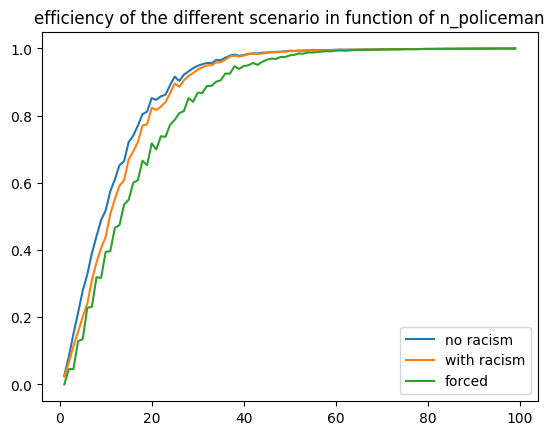

In [30]:
plt.plot(n_policeman, eff_perfect, label='no racism')
plt.plot(n_policeman, eff_racist, label='with racism')
plt.plot(n_policeman, eff_forced, label='forced')

plt.legend()
plt.title("efficiency of the different scenario in function of n_policeman")

plt.show()

### decreasing_rate

In [19]:
town = np.zeros(100) #100
dist_algo_perfect = np.zeros(100)
dist_algo_racist = np.zeros(100)
dist_algo_forced = np.zeros(100)

num_policeman = 14
rate_quiet = 0.0002 
d_rate = np.arange(0.01,0.50,0.01) 
days = 100000
nb_crime = 0
detected_crime_perfect = 0
detected_crime_racist = 0
detected_crime_forced = 0
bias = 0.4

In [22]:
eff_perfect = np.array([])
eff_racist = np.array([])
eff_forced = np.array([])
for decreasing_rate in d_rate:
    print("d_r:",decreasing_rate)
    
    #reinitialyse
    detected_crime_perfect = 0
    detected_crime_racist = 0
    detected_crime_forced = 0
    nb_crime = 0
    for i in range(len(town)):
        town[i] = rate_quiet
        dist_algo_perfect[i] = rate_quiet
        dist_algo_racist[i] = rate_quiet
        dist_algo_forced[i] = rate_quiet
    
    for day in range(days):
        dest_policeman_perfect = get_dest_policeman(dist_algo_perfect)
        dest_policeman_racist = get_dest_rac_policeman(dist_algo_racist)
        dest_policeman_forced = get_dest_forced_policeman(dist_algo_forced)

        nb_crime += generate_crime()
        detected_crime_perfect += detect_crime_p(dest_policeman_perfect)
        detected_crime_racist += detect_crime_r(dest_policeman_racist)
        detected_crime_forced += detect_crime_f(dest_policeman_forced)
        
        town = generate_dist(town)
        dist_algo_perfect = generate_dist(dist_algo_perfect)
        dist_algo_racist = generate_dist(dist_algo_racist)
        dist_algo_forced = generate_dist(dist_algo_forced)
        
    eff_perfect = np.append(eff_perfect, detected_crime_perfect/nb_crime)
    eff_racist = np.append(eff_racist, detected_crime_racist/nb_crime)
    eff_forced = np.append(eff_forced, detected_crime_forced/nb_crime)

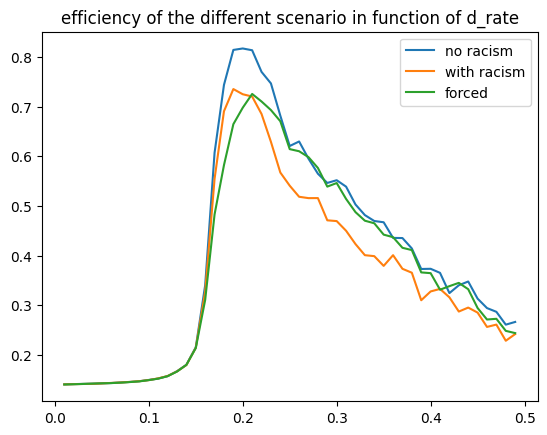

In [21]:
plt.plot(d_rate, eff_perfect, label='no racism')
plt.plot(d_rate, eff_racist, label='with racism')
plt.plot(d_rate, eff_forced, label='forced')

plt.legend()
plt.title("efficiency of the different scenario in function of d_rate")

plt.show()

### rate quiet

In [79]:
town = np.zeros(100) #100
dist_algo_perfect = np.zeros(100)
dist_algo_racist = np.zeros(100)
dist_algo_forced = np.zeros(100)

num_policeman = 24
r_quiet = np.arange(0.0001, 0.004, 0.0002)
decreasing_rate = 0.175 #0.2
days = 100000
nb_crime = 0
detected_crime_perfect = 0
detected_crime_racist = 0
detected_crime_forced = 0
bias = 0.4

In [82]:
eff_perfect = np.array([])
eff_racist = np.array([])
eff_forced = np.array([])
for rate_quiet in r_quiet:
    print("r_q:",rate_quiet)
    
    #reinitialyse
    detected_crime_perfect = 0
    detected_crime_racist = 0
    detected_crime_forced = 0
    nb_crime = 0
    for i in range(len(town)):
        town[i] = rate_quiet
        dist_algo_perfect[i] = rate_quiet
        dist_algo_racist[i] = rate_quiet
        dist_algo_forced[i] = rate_quiet
    
    for day in range(days):
        dest_policeman_perfect = get_dest_policeman(dist_algo_perfect)
        dest_policeman_racist = get_dest_rac_policeman(dist_algo_racist)
        dest_policeman_forced = get_dest_forced_policeman(dist_algo_forced)

        nb_crime += generate_crime()
        detected_crime_perfect += detect_crime_p(dest_policeman_perfect)
        detected_crime_racist += detect_crime_r(dest_policeman_racist)
        detected_crime_forced += detect_crime_f(dest_policeman_forced)
        
        town = generate_dist(town)
        dist_algo_perfect = generate_dist(dist_algo_perfect)
        dist_algo_racist = generate_dist(dist_algo_racist)
        dist_algo_forced = generate_dist(dist_algo_forced)
        
    eff_perfect = np.append(eff_perfect, detected_crime_perfect/nb_crime)
    eff_racist = np.append(eff_racist, detected_crime_racist/nb_crime)
    eff_forced = np.append(eff_forced, detected_crime_forced/nb_crime)

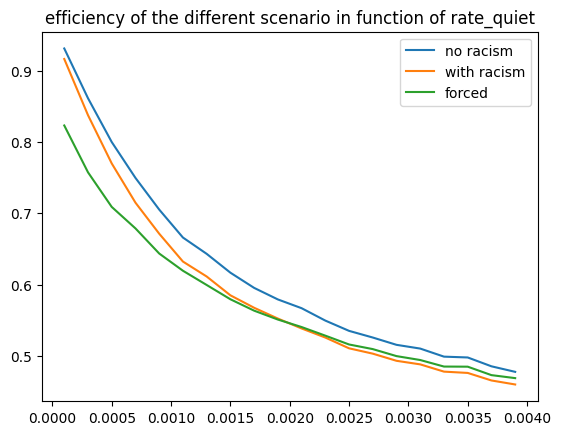

In [81]:
plt.plot(r_quiet, eff_perfect, label='no racism')
plt.plot(r_quiet, eff_racist, label='with racism')
plt.plot(r_quiet, eff_forced, label='forced')

plt.legend()
plt.title("efficiency of the different scenario in function of rate_quiet")

plt.show()